# K-Means Clustering

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# load titanic dataset
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
X = df[['age', 'fare']]

X['age'] = X['age'].fillna(X['age'].mean())
X.isnull().sum()


/tmp/ipykernel_65033/2453356905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())


age     0
fare    0
dtype: int64

In [4]:

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply Kmeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [5]:
# assign cluster labels to the data
df['cluster'] = kmeans.labels_
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [6]:
df['cluster'].unique()

array([2, 1, 0, 4, 3], dtype=int32)

In [7]:

# y_pred = kmeans.predict(X_scaled)

print("Cluster Centroids: \n", kmeans.cluster_centers_)

Cluster Centroids: 
 [[-1.23607148e+00 -2.27886763e-01]
 [ 1.61389551e+00  6.16674355e-02]
 [-2.81624485e-03 -2.50023583e-01]
 [ 4.33577410e-01  9.66716653e+00]
 [ 3.85705993e-02  2.79811012e+00]]


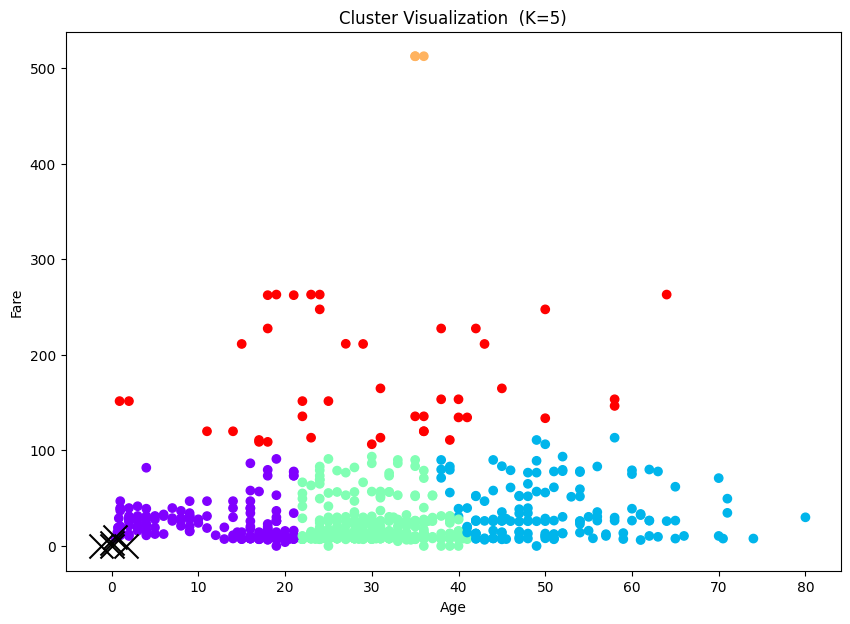

In [8]:
# visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, 
            c='black', 
            marker='x', 
            label='Centroids')

plt.title('Cluster Visualization  (K=5)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [9]:
import plotly.express as px

In [10]:
fig = px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [11]:
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
fig.show()

In [12]:
# plot parallel coordinates
fig = px.parallel_coordinates(df, color='cluster', title='titanic cluster')
fig.show()